## Data

### Authors
- Brett Kinsella - Data Pipeline & Cleaning, Exploratory Data Analysis 


### Data Overview
Dataset Name: Police Calls for Service 2025
- Link to dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 466979
- Number of variables: 14
- Description of variables: 

    | Variable | Description |
    |----------|-------------|
    | INCIDENT_NUM  | Unique incident number identifier |
    | DATE_TIME  | Recorded date and time of incident |
    | DAY_OF_WEEK  | Day of the week incident occurred  |
    | ADDRESS_NUMBER_PRIMARY  | Primary address number |
    | ADDRESS_DIR_PRIMARY  | Primary address direction |
    | ADDRESS_ROAD_PRIMARY  | Primary address street name |
    | ADDRESS_SFX_PRIMARY  | Primary address suffix |
    | ADDRESS_DIR_INTERSECTING  | Intersecting address direction |
    | ADDRESS_ROAD_INTERSECTING  | Intersecting address street name |
    | ADDRESS_SFX_INTERSECTING  | Intersecting address suffix |
    | CALL_TYPE  |  Code corresponding to type of incident |
    | DISPOSITION  | Code corresponding to outcome or resolution of the incident |
    | BEAT  | Geographic patrol zone or district number that the incident originated from |
    | PRIORITY  | Urgency level assigned to the incident |

- Descriptions of any shortcomings: There are large amounts of missing fields in the primary address suffix column and primary address direction column.  This is likely due to many streets not having a suffix or direction, but this may cause complications for data analysis as entries with missing fields don't necessarily correlate to data that can be thrown out.  An even more extreme version of this can be seen in all columns corresponding to the intersecting address for a given incident as most include only the intersecting street name or completely exclude any intersecting data.

Dataset Name: Police beats
- Link to dataset: https://data.sandiego.gov/datasets/police-beats/
- Number of observations:
- Number of variables: 
- Description of variables:
- Descriptions of any shortcomings:

### Dataset: Police Calls for Service 2025
- Dataset Description:
    - This is 
- Major Concerns and Biases:
    - This is


In [1]:
# if you don't already have these packages, uncomment this line
# %pip install pandas
# %pip install seaborn
# %pip install geopandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset into a Pandas dataframe
print('-' * 40 + ' Load dataset into Pandas dataframe ' + '-' * 40 )
df = pd.read_csv('data/00-raw/pd_calls_for_service_2025_datasd.csv')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.head()

---------------------------------------- Load dataset into Pandas dataframe ----------------------------------------


,INCIDENT_NUM,DATE_TIME,DAY_OF_WEEK,ADDRESS_NUMBER_PRIMARY,ADDRESS_DIR_PRIMARY,ADDRESS_ROAD_PRIMARY,ADDRESS_SFX_PRIMARY,ADDRESS_DIR_INTERSECTING,ADDRESS_ROAD_INTERSECTING,ADDRESS_SFX_INTERSECTING,CALL_TYPE,DISPOSITION,BEAT,PRIORITY
0,E25120020309,2025-12-15 09:48:49,2,4200,NaN,03RD,AVE,NaN,NaN,NaN,487R,K,627,9
1,E25120025105,2025-12-18 16:32:13,5,5500,NaN,MILDRED,ST,NaN,NaN,NaN,10852R,K,622,9
2,E25120028508,2025-12-20 22:43:23,7,500,NaN,05TH,AVE,NaN,NaN,NaN,415,A,523,2
3,E25120028604,2025-12-21 00:02:05,1,0,NaN,SHOPS LOG,NaN,NaN,NaN,NaN,SHOPS,W,-1,4
4,E25120028605,2025-12-21 00:02:41,1,0,NaN,MCRT LOG,NaN,NaN,NaN,NaN,INFO,W,-1,2


In [2]:
# Determine how much data is missing and where it's missing
print('-' * 30 + ' Determine how much data is missing and where its missing ' + '-' * 30 )
num_nulls = df.isna().sum()
print(f'Number of missing values: \n{num_nulls}\n')

------------------------------ Determine how much data is missing and where its missing ------------------------------
Number of missing values: 
INCIDENT_NUM                      0
DATE_TIME                         0
DAY_OF_WEEK                       0
ADDRESS_NUMBER_PRIMARY            0
ADDRESS_DIR_PRIMARY          446434
ADDRESS_ROAD_PRIMARY           6265
ADDRESS_SFX_PRIMARY           48447
ADDRESS_DIR_INTERSECTING     466978
ADDRESS_ROAD_INTERSECTING    387035
ADDRESS_SFX_INTERSECTING     466978
CALL_TYPE                       985
DISPOSITION                    2351
BEAT                              0
PRIORITY                          0
dtype: int64



------------------------------------------------ Determine if there are any outliers or suspicious entries  ------------------------------------------------


DAY_OF_WEEK
3    70065
6    68988
4    68574
5    67900
2    66675
7    64093
1    60683
Name: count, dtype: int64

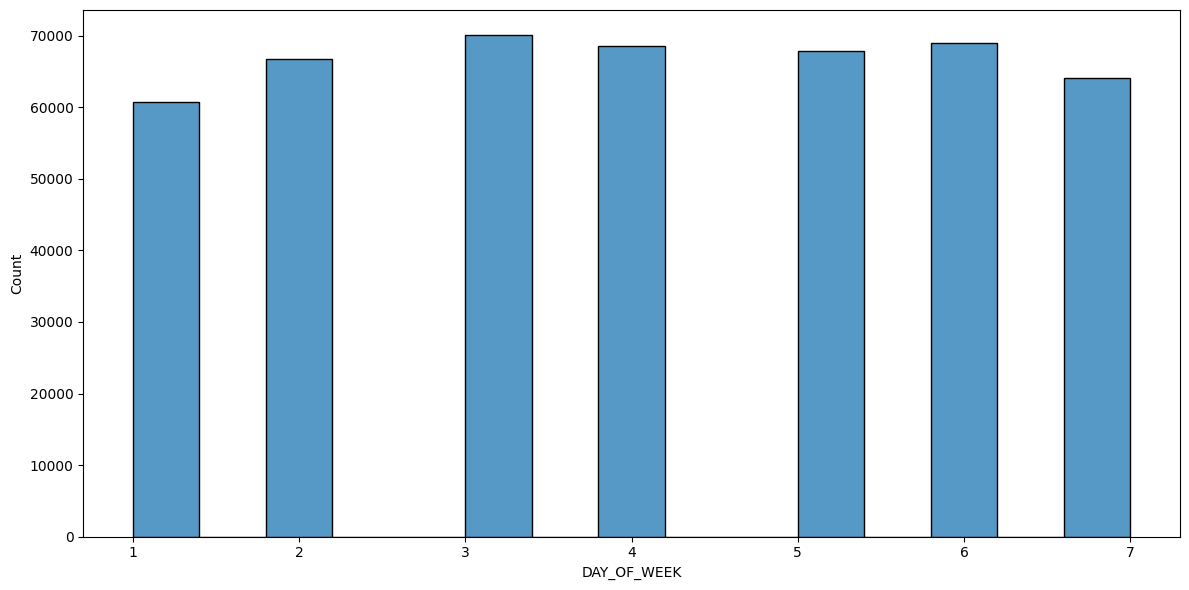

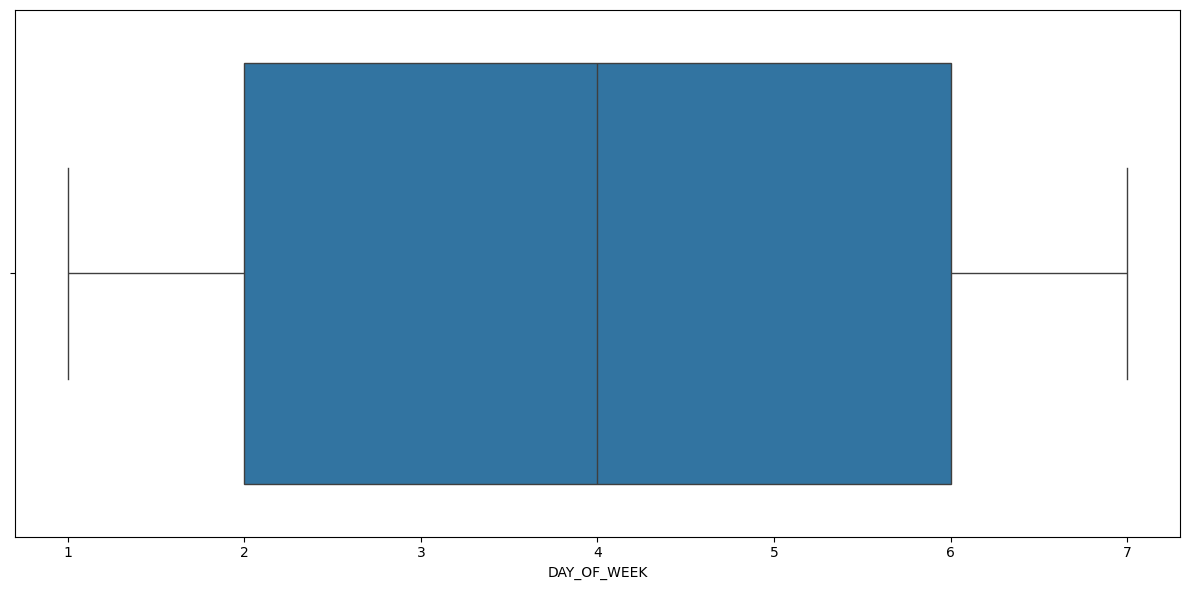

CALL_TYPE
SELENF    39210
415       37859
T         26394
CW        23612
459A      17589
MPSSTP    15223
1186      13321
415V      11654
5150      10973
586       10546
911       10467
1183       9286
415N       9251
1151       9087
MTG        7665
HZRD       7534
1016       7312
1185       7104
AU2        6877
602        6058
Name: count, dtype: int64

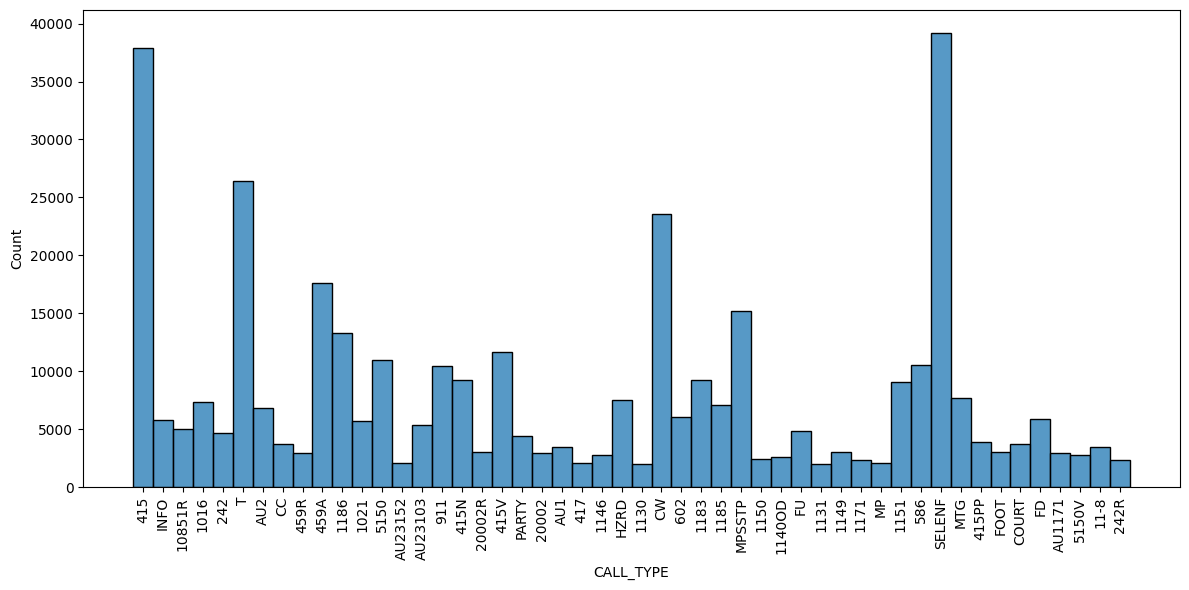

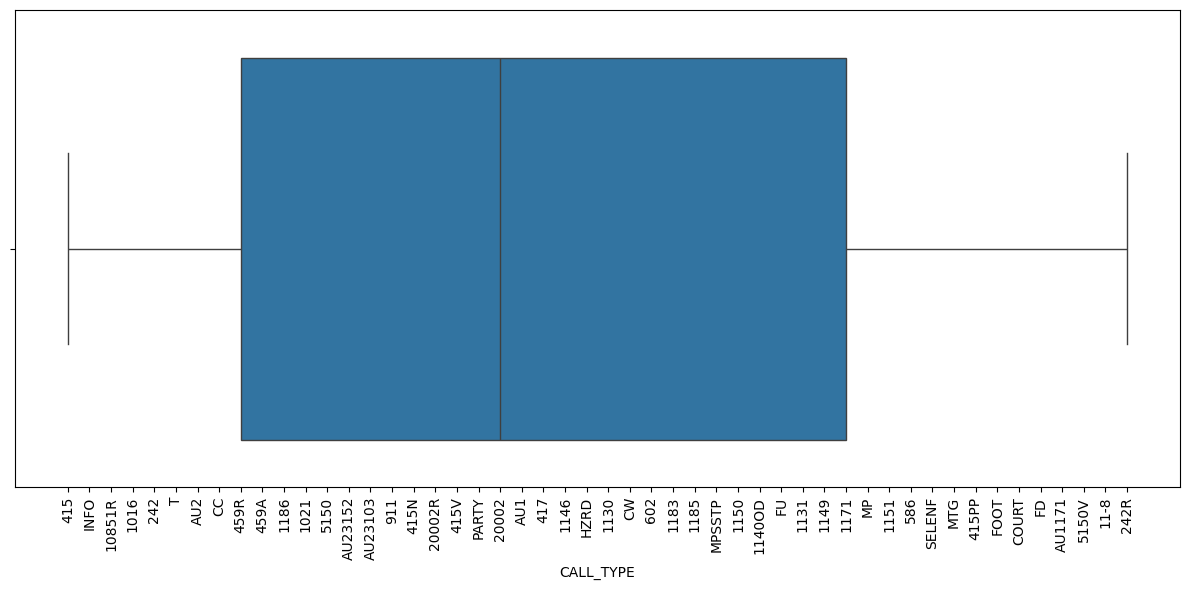

DISPOSITION
K      250059
O       69753
W       36876
CAN     36342
R       35378
A       19045
U        7902
DUP      7405
S        1151
X         599
KB         55
SS-        18
OHR        14
V          10
RB          7
RHR         4
KHR         4
AB          3
DEF         1
360         1
Name: count, dtype: int64

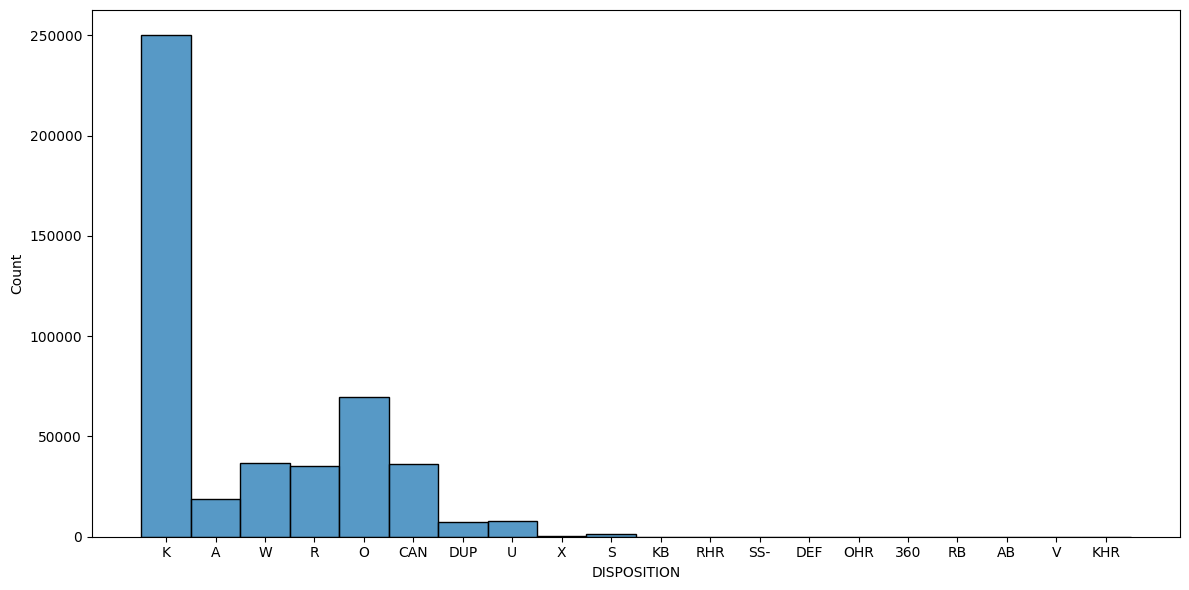

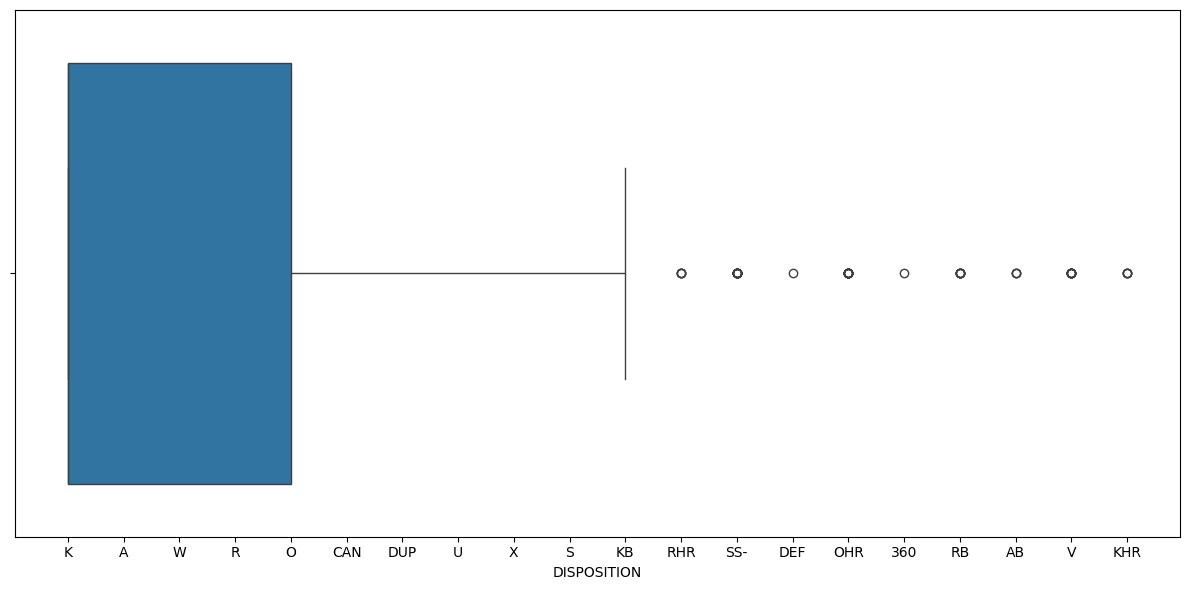

BEAT
 521    28989
 122    17084
 524    16704
 313    13615
 512    11575
 611    10073
 242    10066
 627     9854
 813     9799
 124     9556
 115     9174
 315     8900
-1       8735
 712     8535
 614     8358
 311     8245
 511     7625
 523     7373
 723     6720
 934     5786
Name: count, dtype: int64

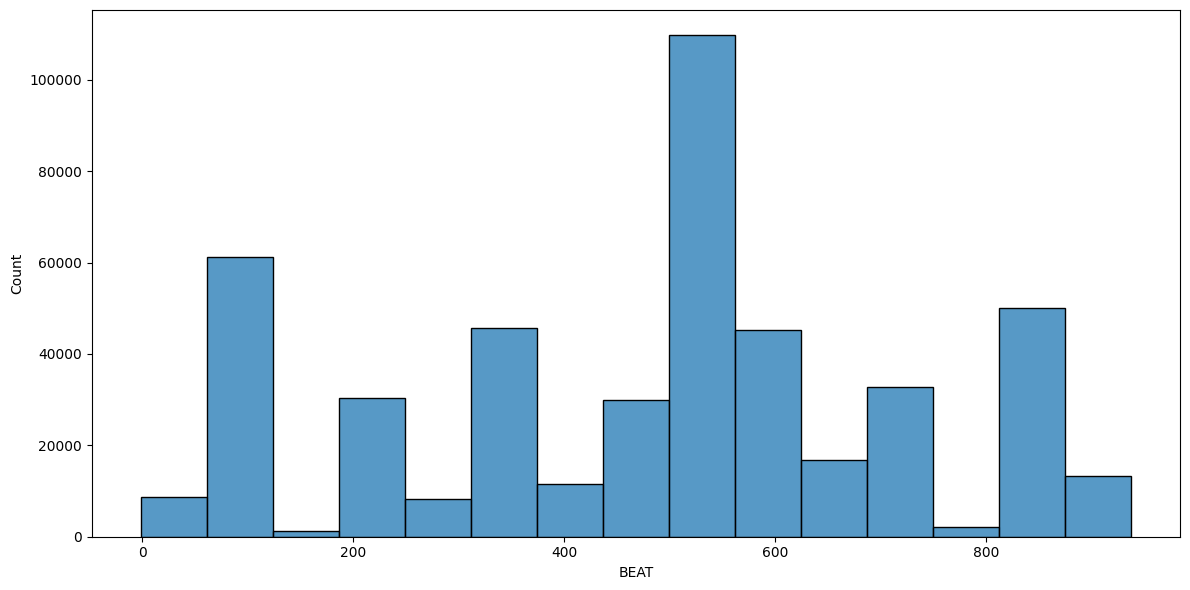

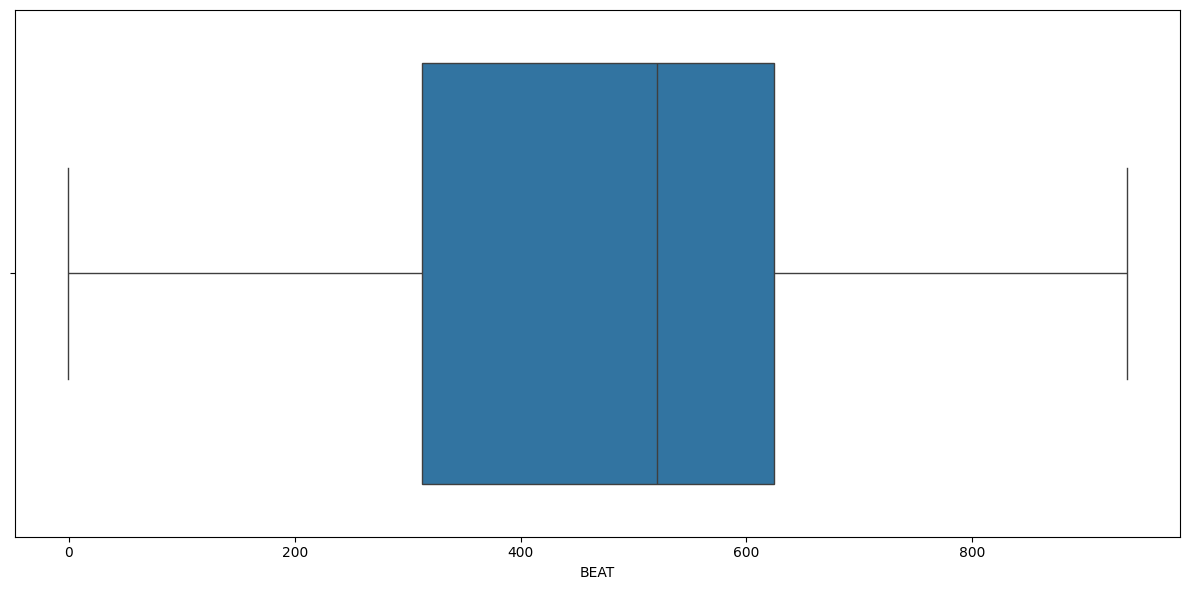

PRIORITY
2    207102
3    113876
1     91851
0     27613
4     23205
9      3328
7         2
5         1
Name: count, dtype: int64

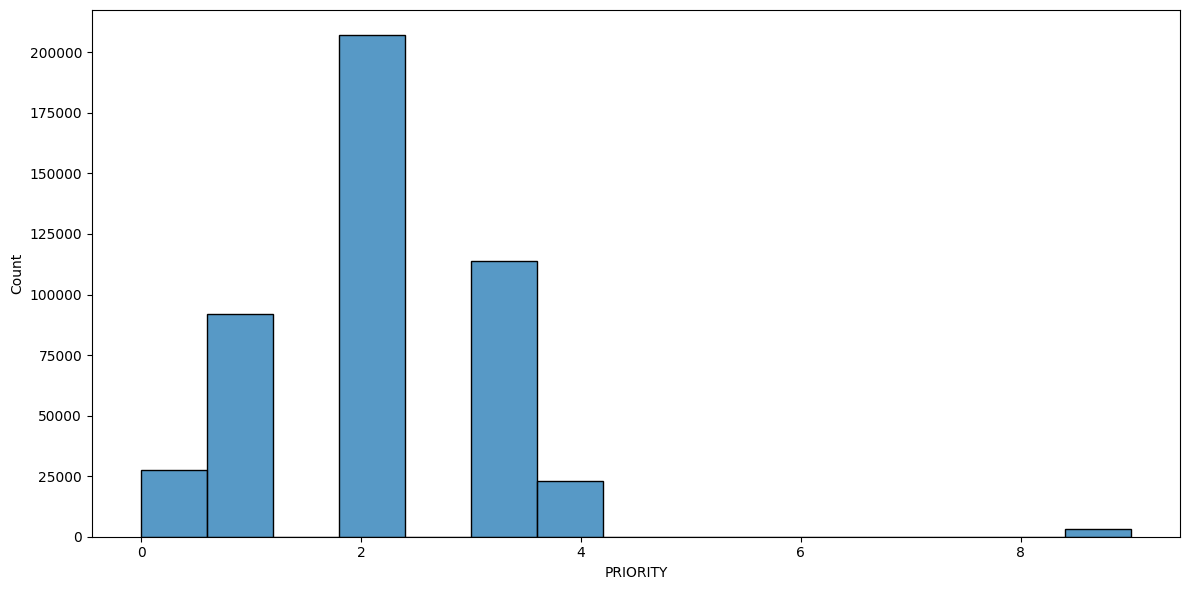

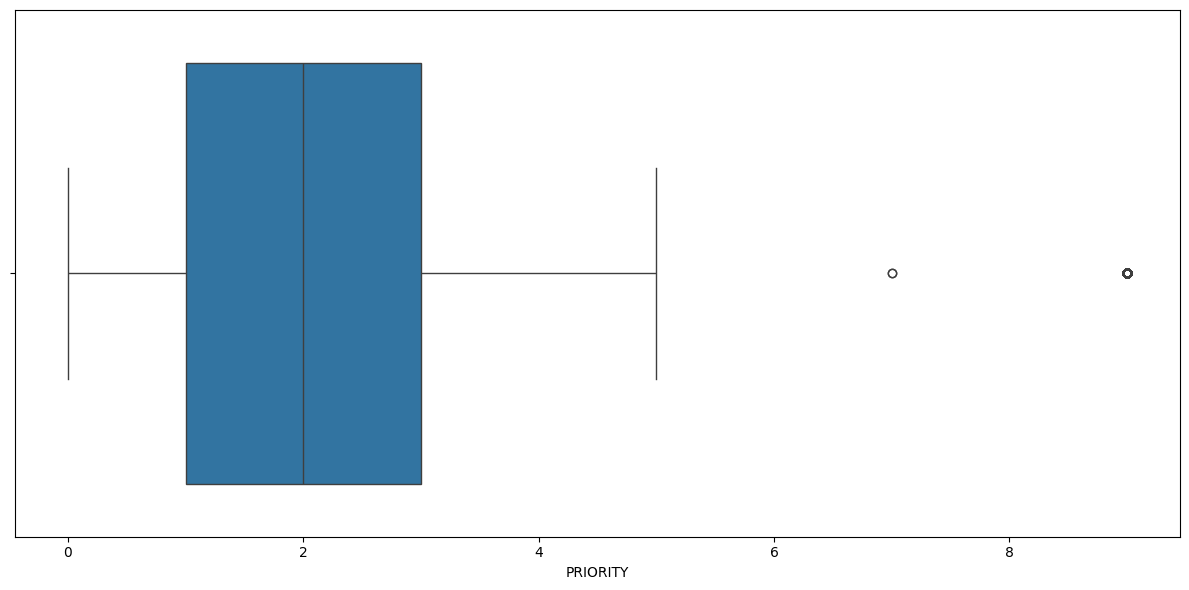

In [3]:
# Determine if there are any outliers or suspicious entries
print('-' * 48 + ' Determine if there are any outliers or suspicious entries  ' + '-' * 48 )

vars_of_interest = ['DAY_OF_WEEK', 'CALL_TYPE', 'DISPOSITION', 'BEAT', 'PRIORITY']
for var in vars_of_interest:
    if var == 'CALL_TYPE':
        # Top 10 value counts
        display(df[var].value_counts().nlargest(20))

        # Histogram
        plt.figure(figsize=(12, 6))
        top_cats = df['CALL_TYPE'].value_counts().nlargest(50).index
        sns.histplot(data=df[df['CALL_TYPE'].isin(top_cats)], x='CALL_TYPE')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        # Boxplot
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[df['CALL_TYPE'].isin(top_cats)], x='CALL_TYPE')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        # Top 10 value counts
        display(df[var].value_counts().nlargest(20))

        # Histogram
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df, x=var, bins=15)
        plt.tight_layout()
        plt.show()

        # Boxplot
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=var)
        plt.tight_layout()
        plt.show()



In [4]:
# Clean the dataset
print('-' * 48 + ' Clean the dataset ' + '-' * 48 )
print(f'\nTotal observations before cleaning: {len(df)}\n')

# Remove intersecting street columns
df_cleaned = df.drop(labels=['ADDRESS_DIR_INTERSECTING', 'ADDRESS_ROAD_INTERSECTING', 'ADDRESS_SFX_INTERSECTING'], axis='columns')

# Remove any row with missing ADDRESS_ROAD_PRIMARY, CALL_TYPE, or DISPOSITION entries
df_cleaned = df_cleaned.dropna(subset=['ADDRESS_ROAD_PRIMARY', 'CALL_TYPE', 'DISPOSITION']).reset_index(drop=True)

df_cleaned.to_csv('data/01-processed/pd_calls_for_service_2025_datasd_cleaned.csv', index=False)
display(df_cleaned.head())
print(f'Total observations after cleaning: {len(df_cleaned)}\n')

------------------------------------------------ Clean the dataset ------------------------------------------------

Total observations before cleaning: 466978



,INCIDENT_NUM,DATE_TIME,DAY_OF_WEEK,ADDRESS_NUMBER_PRIMARY,ADDRESS_DIR_PRIMARY,ADDRESS_ROAD_PRIMARY,ADDRESS_SFX_PRIMARY,CALL_TYPE,DISPOSITION,BEAT,PRIORITY
0,E25120020309,2025-12-15 09:48:49,2,4200,NaN,03RD,AVE,487R,K,627,9
1,E25120025105,2025-12-18 16:32:13,5,5500,NaN,MILDRED,ST,10852R,K,622,9
2,E25120028508,2025-12-20 22:43:23,7,500,NaN,05TH,AVE,415,A,523,2
3,E25120028604,2025-12-21 00:02:05,1,0,NaN,SHOPS LOG,NaN,SHOPS,W,-1,4
4,E25120028605,2025-12-21 00:02:41,1,0,NaN,MCRT LOG,NaN,INFO,W,-1,2


Total observations after cleaning: 458035



In [5]:
import re

# generate cleaed dataset with call type category
df_cleaned_v2 = df_cleaned.copy()

# Read manually maintained mapping table (used only as a mapping reference)
map_df = pd.read_csv("data/00-raw/calltypes_category_mapping_table.csv")

# Normalize mapping-table column names:
#    - Replace "/" with " or "
#    - Replace spaces with "_"
#    - Remove other symbols (keep letters/numbers/_)
#    - Lowercase for stability
def norm_col(col: str) -> str:
    col = col.strip().lower()
    col = col.replace("/", " or ")
    col = col.replace(" ", "_")
    col = re.sub(r"[^a-z0-9_]+", "", col)   # drop other symbols
    col = re.sub(r"_+", "_", col).strip("_")
    return col

# Only normalize the 3rd column name
old_cat_col = map_df.columns[2]
new_cat_col = norm_col(old_cat_col)

map_df = map_df.rename(columns={old_cat_col: new_cat_col})

key_col = "call_type"
cat_col = new_cat_col       # normalized category column name
calltype_mapping = map_df.set_index(key_col)[cat_col].to_dict()

# Apply mapping to main dataset
#    Create a clean, code-friendly new column name
df_cleaned_v2["CALL_TYPE_CATEGORY"] = df_cleaned_v2["CALL_TYPE"].astype(str).map(calltype_mapping)

# Report unmapped items (before filling)
call_type_unmapped_mask = df_cleaned_v2["CALL_TYPE_CATEGORY"].isna()
num_unmapped = call_type_unmapped_mask.sum()
print(f"Number of unmapped rows (CALL_TYPE_CATEGORY): {num_unmapped}")

# Show which CALL_TYPE values were not mapped (and how many times each occurs)
unmapped_calltypes = df_cleaned_v2.loc[call_type_unmapped_mask, "CALL_TYPE"].value_counts()
display(unmapped_calltypes.to_frame("unmapped_count"))

# Delete rows whose CALL_TYPE was not mapped (CALL_TYPE_CATEGORY is NaN)
call_type_unmapped_mask = df_cleaned_v2["CALL_TYPE_CATEGORY"].isna()

df_cleaned_v2 = df_cleaned_v2.loc[~call_type_unmapped_mask].copy()

# Fill unmapped values with a tag
df_cleaned_v2["CALL_TYPE_CATEGORY"] = df_cleaned_v2["CALL_TYPE_CATEGORY"].fillna("unmapped_unknown")

# Quick check
display(df_cleaned_v2[["CALL_TYPE", "CALL_TYPE_CATEGORY"]].head())

Number of unmapped rows (CALL_TYPE_CATEGORY): 8488


,unmapped_count
CALL_TYPE,
11-8,3380
CDCC,1521
11-6,1272
11-7,1049
LPR-1085,588
SVO,423
LPR,212
LPR-SUSP,20
LPR-AU,17


,CALL_TYPE,CALL_TYPE_CATEGORY
0,487R,Administrative / Legal Process
1,10852R,Administrative / Legal Process
2,415,Public Order / Disturbance
3,SHOPS,Service / Non-Emergency Assist
4,INFO,Service / Non-Emergency Assist


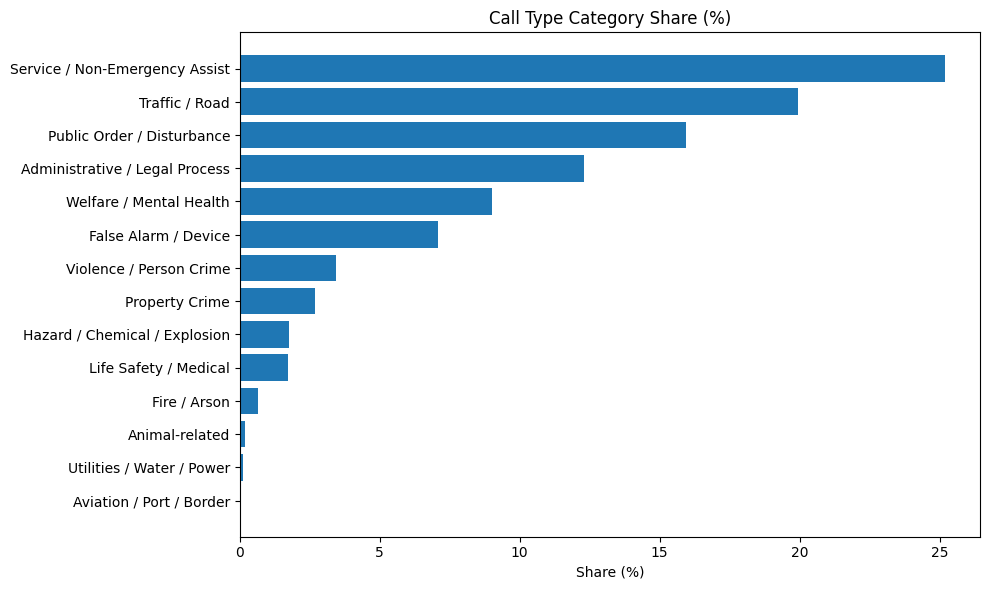

In [6]:
counts = df_cleaned_v2["CALL_TYPE_CATEGORY"].value_counts()
pct = counts / counts.sum() * 100

plt.figure(figsize=(10, 6))
plt.barh(pct.index[::-1], pct.values[::-1])
plt.xlabel("Share (%)")
plt.title("Call Type Category Share (%)")
plt.tight_layout()
plt.show()

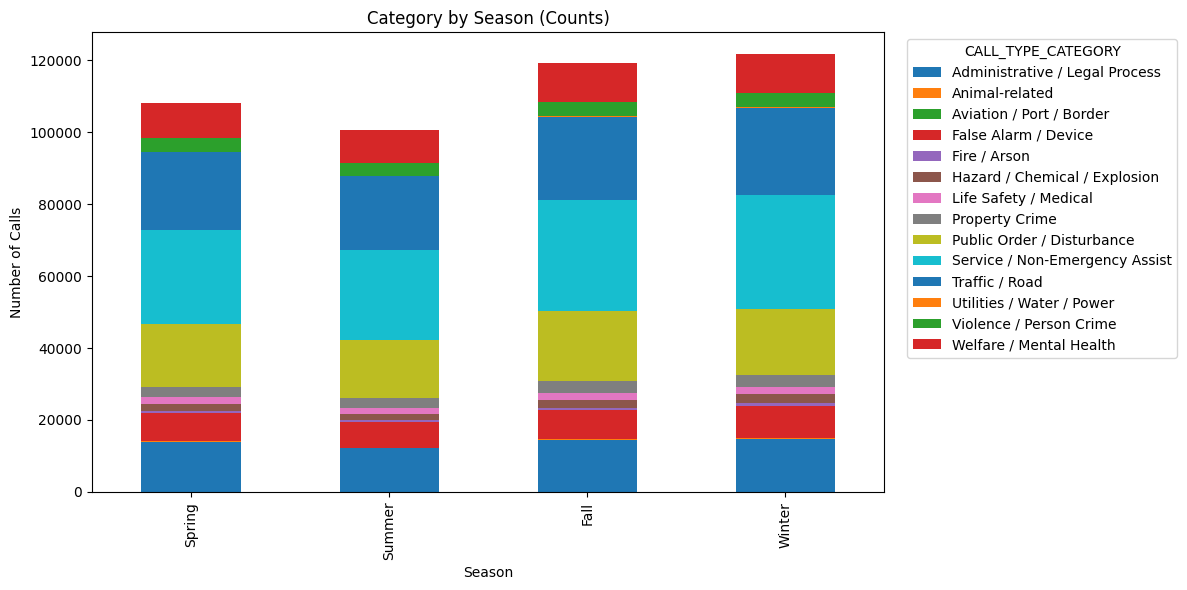

In [7]:
time_col = "DATE_TIME"

month = pd.to_datetime(df_cleaned_v2[time_col]).dt.month

df_cleaned_v2["SEASON"] = month.map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                          3: 'Spring', 4: 'Spring', 5: 'Spring',
                          6: 'Summer', 7: 'Summer', 8: 'Summer',
                          9: 'Fall', 10: 'Fall', 11: 'Fall'})
                        
pivot = (
    df_cleaned_v2.groupby(["SEASON", "CALL_TYPE_CATEGORY"])
       .size()
       .unstack(fill_value=0)
       .reindex(["Spring", "Summer", "Fall", "Winter"])
)

ax = pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
ax.set_xlabel("Season")
ax.set_ylabel("Number of Calls")
ax.set_title("Category by Season (Counts)")
ax.legend(title="CALL_TYPE_CATEGORY", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [8]:
dispo_col = "DISPOSITION"

# Normalize codes
codes = df_cleaned_v2[dispo_col].astype("string").str.strip().str.upper()

# Mapping based on self-defined categories
dispo_mapping = {
    # Cancelled / No response
    "W": "Cancelled / No response",
    "X": "Cancelled / No response",
    "CAN": "Cancelled / No response",

    # Duplicate
    "DUP": "Duplicate",
    "V": "Duplicate",

    # Arrest
    "A": "Arrest",
    "AB": "Arrest",
    "AHR": "Arrest",

    # Report taken
    "R": "Report taken",
    "RB": "Report taken",
    "RHR": "Report taken",

    # No report / No further action
    "K": "No report / No further action",
    "KB": "No report / No further action",
    "KHR": "No report / No further action",

    # Unfounded
    "U": "Unfounded",

    # Vehicle-related outcome (optional but clearer than dumping into Other)
    "S": "Vehicle related",

    # Other
    "O": "Other",
    "OHR": "Other",
}

# New column for disposition: DISPOSITION_CATEGORY
new_col = "DISPOSITION_CATEGORY"

# Apply mapping
df_cleaned_v2[new_col] = codes.map(dispo_mapping)

# Report mapping failure
dispo_unmapped_mask = df_cleaned_v2[new_col].isna()
dispo_unmapped_n = dispo_unmapped_mask.sum()
print(f"Number of unmapped rows ({new_col}): {dispo_unmapped_n}")
display(df_cleaned_v2.loc[dispo_unmapped_mask, [dispo_col, new_col]].head(10))

# High risk flag: ends with "HR"
df_cleaned_v2["IS_HIGH_RISK"] = codes.str.endswith("HR")

# Quick check
display(df_cleaned_v2[[dispo_col, new_col, "IS_HIGH_RISK"]].head())

# Delete all rows with mapping failure
df_cleaned_v2 = df_cleaned_v2.loc[~dispo_unmapped_mask].copy()

# Export the new dataset (original columns + the new high-level category)
out_path = "data/01-processed/pd_calls_for_service_2025_datasd_cleaned_v2.csv"
df_cleaned_v2.to_csv(out_path, index=False)

print(f'Total observations after cleaning: {len(df_cleaned_v2)}\n')

Number of unmapped rows (DISPOSITION_CATEGORY): 20


,DISPOSITION,DISPOSITION_CATEGORY
26239,SS-,NaN
34626,SS-,NaN
37572,DEF,NaN
54846,SS-,NaN
54925,SS-,NaN
54968,SS-,NaN
54986,SS-,NaN
77732,360,NaN
101162,SS-,NaN
107062,SS-,NaN


,DISPOSITION,DISPOSITION_CATEGORY,IS_HIGH_RISK
0,K,No report / No further action,False
1,K,No report / No further action,False
2,A,Arrest,False
3,W,Cancelled / No response,False
4,W,Cancelled / No response,False


Total observations after cleaning: 449527



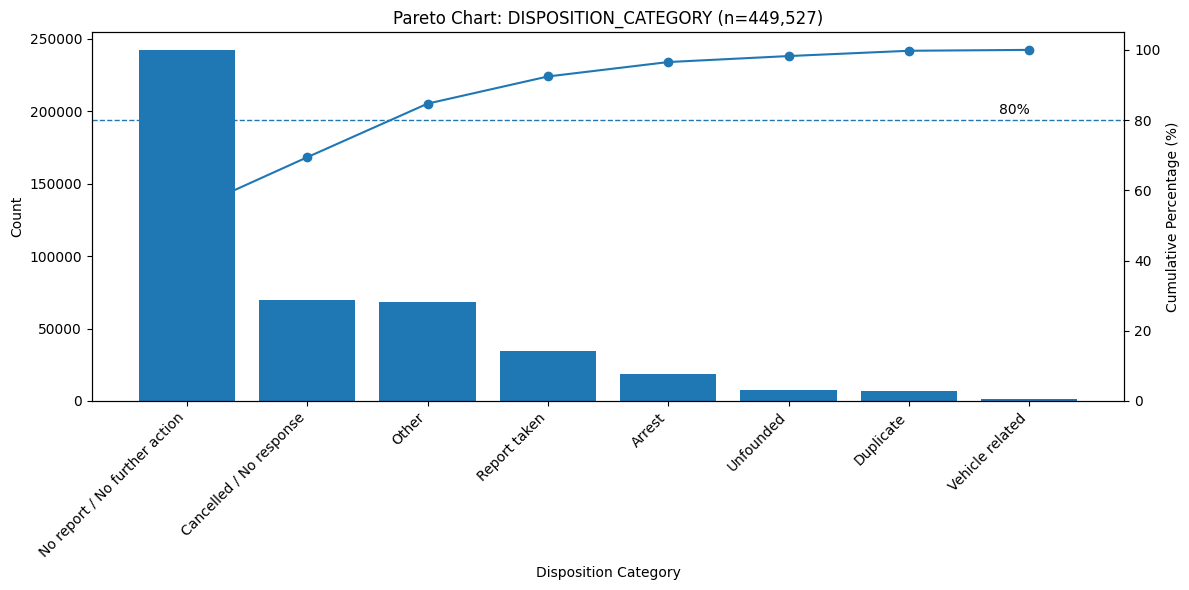

Top 3 categories account for ~80% of all records.


In [ ]:
import numpy as np

dispo_cat_col = "DISPOSITION_CATEGORY"

counts = (
    df_cleaned_v2[dispo_cat_col]
    .dropna()
    .value_counts()
    .sort_values(ascending=False)
)

cum_pct = counts.cumsum() / counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bars (counts)
ax1.bar(counts.index.astype(str), counts.values)
ax1.set_ylabel("Count")
ax1.set_xlabel("Disposition Category")
ax1.set_title(f"Pareto Chart: {dispo_cat_col} (n={counts.sum():,})")

# Rotate + align x tick labels (correct way)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

# Line (cumulative %)
ax2 = ax1.twinx()
ax2.plot(counts.index.astype(str), cum_pct.values, marker="o")
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 105)

# 80% reference line
ax2.axhline(80, linestyle="--", linewidth=1)
ax2.text(len(counts.index) - 1, 81, "80%", ha="right", va="bottom")

plt.tight_layout()
plt.show()

In [ ]:
# Visualize the dataset
import geopandas as gpd
print('-' * 45 + ' Visualize the dataset ' + '-' * 45 + '\n')

# Time series plot of incident count
daily_incident_count_df = df_cleaned['DATE_TIME'].dt.date.value_counts().to_frame()
display(daily_incident_count_df.head())
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_incident_count_df, x='DATE_TIME', y='count', label='Daily Incident Count', color='blue', lw=1.5)
plt.title('Daily Police Calls for Service Count (2025-2026)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Daily Incident Count')
plt.xlabel('Date (year-month)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# Choropleth plot
SD_beats_df = gpd.GeoDataFrame.from_file('data/00-raw/pd_beats_datasd.geojson')
call_counts = df['BEAT'].value_counts().to_frame().reset_index()

call_counts = call_counts.rename(columns={'BEAT': 'beat'})
SD_beats_df = SD_beats_df.merge(call_counts, on='beat', how='left')
display(SD_beats_df.head())

SD_beats_df.plot(column='count', cmap='magma', legend=True, figsize=(12, 10))
plt.title('San Diego Emergency Calls by Beat')
plt.show()

SD_beats_df.plot(column='count', cmap='magma', legend=True, figsize=(12, 10))
print(SD_beats_df.total_bounds)
plt.xlim([-117.20, -117.08])
plt.ylim([32.68, 32.75])
plt.title('San Diego Emergency Calls by Beat- highest call density')
plt.show()